### Question 1 - Does the individual teams’ actual productivity exceed their targeted productivity, and which team is the most/worst productive?

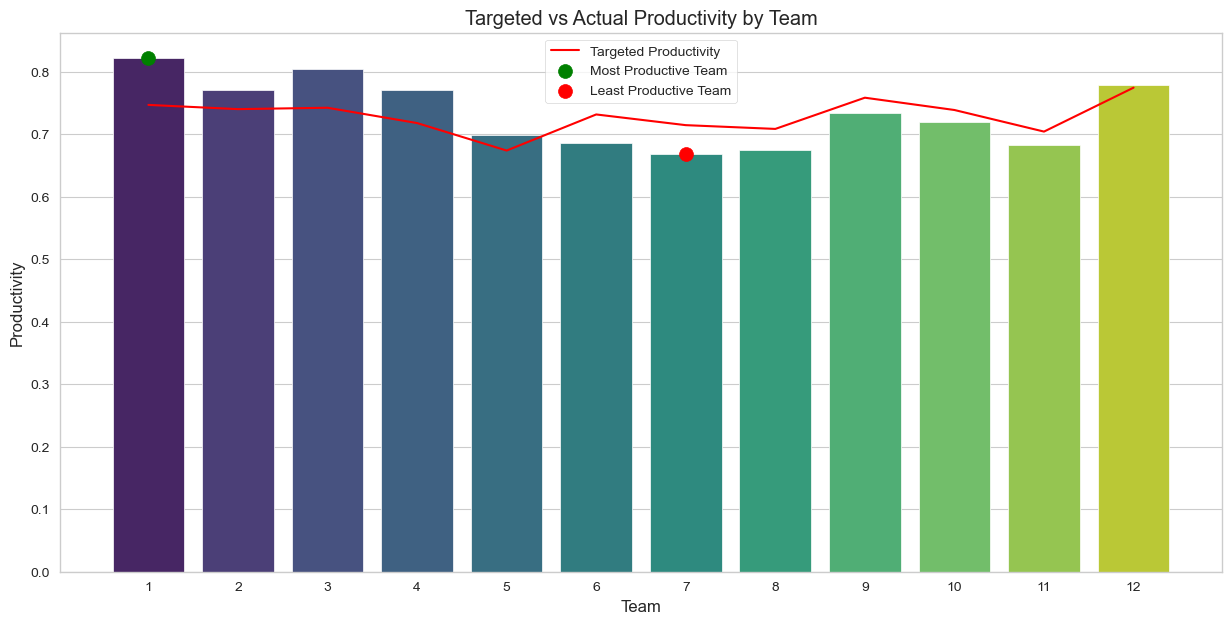

(1,
 7,
     team  targeted_productivity  actual_productivity  exceeded_target
 0      1               0.746667             0.821054             True
 1      2               0.739908             0.770855             True
 2      3               0.742105             0.803880             True
 3      4               0.717619             0.770035             True
 4      5               0.673656             0.697981             True
 5      6               0.731383             0.685385            False
 6      7               0.714271             0.668006            False
 7      8               0.708257             0.674148            False
 8      9               0.758173             0.734462            False
 9     10               0.738500             0.719736            False
 10    11               0.703977             0.681985            False
 11    12               0.774242             0.779055             True)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load the dataset
data = pd.read_csv("garments_worker_productivity.csv")

# Group by team and calculate mean targeted and actual productivity
team_productivity = data.groupby('team').agg({'targeted_productivity': 'mean', 'actual_productivity': 'mean'}).reset_index()

# Identify teams where actual productivity exceeded targeted productivity
team_productivity['exceeded_target'] = team_productivity['actual_productivity'] > team_productivity['targeted_productivity']

# Identify the most and least productive teams based on actual productivity
most_productive_team = team_productivity[team_productivity['actual_productivity'] == team_productivity['actual_productivity'].max()]['team'].values[0]
least_productive_team = team_productivity[team_productivity['actual_productivity'] == team_productivity['actual_productivity'].min()]['team'].values[0]

# Create a visualization
plt.figure(figsize=(15, 7))
sns.barplot(x='team', y='actual_productivity', data=team_productivity, palette='viridis', ci=None)
plt.plot(team_productivity['targeted_productivity'], color='red', label='Targeted Productivity')
plt.scatter([most_productive_team - 1], [team_productivity[team_productivity['team'] == most_productive_team]['actual_productivity']], color='green', label='Most Productive Team', s=100)
plt.scatter([least_productive_team - 1], [team_productivity[team_productivity['team'] == least_productive_team]['actual_productivity']], color='red', label='Least Productive Team', s=100)
plt.title('Targeted vs Actual Productivity by Team')
plt.xlabel('Team')
plt.ylabel('Productivity')
plt.legend()
plt.savefig("team_productivity.png")
plt.show()

most_productive_team, least_productive_team, team_productivity



### Question 2 - Which of the two garment production processes (i.e., sewing and finishing) is the hardest? 

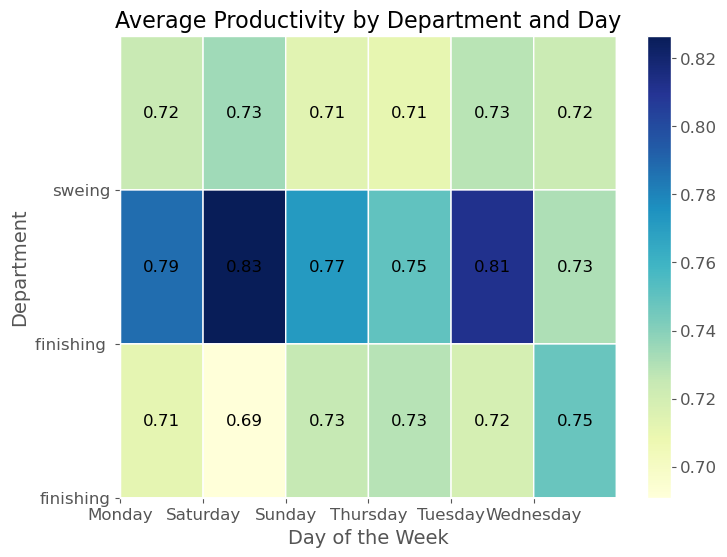

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("garments_worker_productivity.csv")

# Aggregate the data by department and process type
process_data = data.groupby(["department", "day"]).agg({"actual_productivity": "mean"})

# Create a pivot table to display the results
pivot_table = process_data.pivot_table(index="department", columns="day", values="actual_productivity")

# Set the plot style and size
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))

# Create the heatmap
heatmap = plt.pcolor(pivot_table, cmap="YlGnBu", edgecolors="white", linewidths=1)

# Add the colorbar
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)

# Set the title, labels, and ticks
plt.title("Average Productivity by Department and Day", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Department", fontsize=14)
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, fontsize=12)
plt.yticks(range(len(pivot_table.index)), pivot_table.index, fontsize=12)

# Add the data labels
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j + 0.5, i + 0.5, f"{pivot_table.iloc[i, j]:.2f}", ha="center", va="center", fontsize=12)

# Save the plot as a PNG
plt.savefig("productivity_heatmap.png", dpi=300)

# Show the plot
plt.show()

### Question 3 - Which of the days is mostly the rest day for the workers and how does the resting affect their productivity afterwards? 

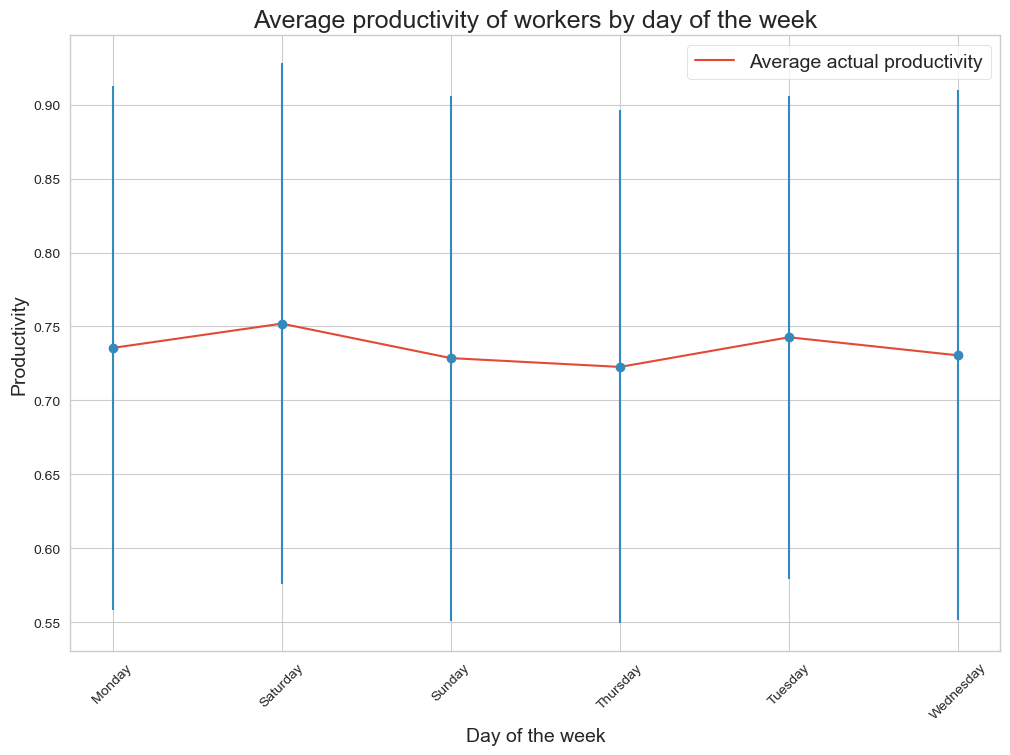

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Load the dataset
data = pd.read_csv("garments_worker_productivity.csv")

# Group the data by day and compute the mean and standard deviation
grouped = data.groupby("day").agg({"actual_productivity": ["mean", "std"]})

# Create a new figure with the specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the mean productivity as a line graph
grouped["actual_productivity"]["mean"].plot.line(ax=ax)

# Add the title, labels, and legend to the plot
ax.set_title("Average productivity of workers by day of the week", fontsize=18)
ax.set_xlabel("Day of the week", fontsize=14)
ax.set_ylabel("Productivity", fontsize=14)
ax.legend(["Average actual productivity"], fontsize=14)

# Add error bars to represent the standard deviation of productivity
ax.errorbar(grouped.index, grouped["actual_productivity"]["mean"], yerr=grouped["actual_productivity"]["std"], fmt='o')

# Rotate the x-axis
plt.xticks(rotation=45)

# Save the plot as a PNG
plt.savefig("productivity_by_day.png", bbox_inches='tight')

### Question 4 - Part 1 - When does the company pay more incentive to its workers? And does both sewing and finishing departments enjoy the same incentives? 

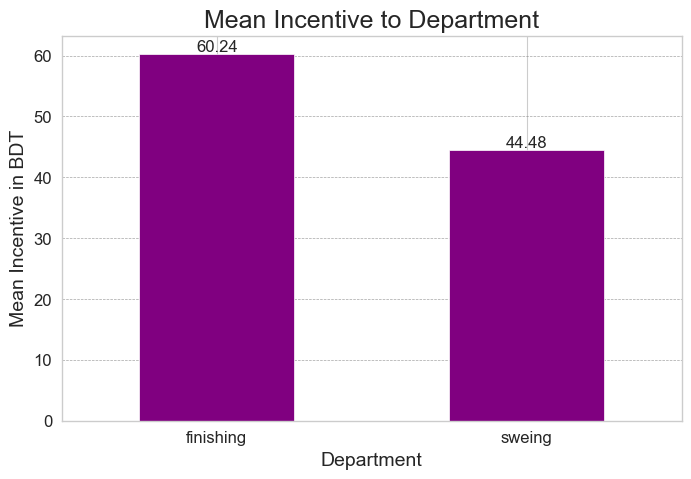

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Load the dataset
data = pd.read_csv("garments_worker_productivity.csv")

# Group the data by department and find the mean of the incentive column
department_incentive_mean = data.groupby("department")["incentive"].mean()

# Filter out the departments with no data
department_incentive_mean = department_incentive_mean[department_incentive_mean != 0]

# Plot the mean incentives for each department
fig, ax = plt.subplots(figsize=(8, 5))

department_incentive_mean.plot.bar(ax=ax, color='purple')

# Add gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Add the title, labels, and legend
ax.set_title("Mean Incentive to Department", fontsize=18)
ax.set_xlabel("Department", fontsize=14)
ax.set_ylabel("Mean Incentive in BDT", fontsize=14)

# Rotate the x-axis
plt.xticks(rotation=0)

# Increase the font size of the x-axis labels
ax.tick_params(axis='x', labelsize=12)

# Increase the font size of the y-axis labels
ax.tick_params(axis='y', labelsize=12)

# Add value labels to the bars
for i, v in enumerate(department_incentive_mean):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=12)

# Save the plot as a PNG
plt.savefig("mean_incentive_department.png")

# Show the plot
plt.show()

### Question 4 - Part 2 - When does the company pay more incentive to its workers? And does both sewing and finishing departments enjoy the same incentives? 

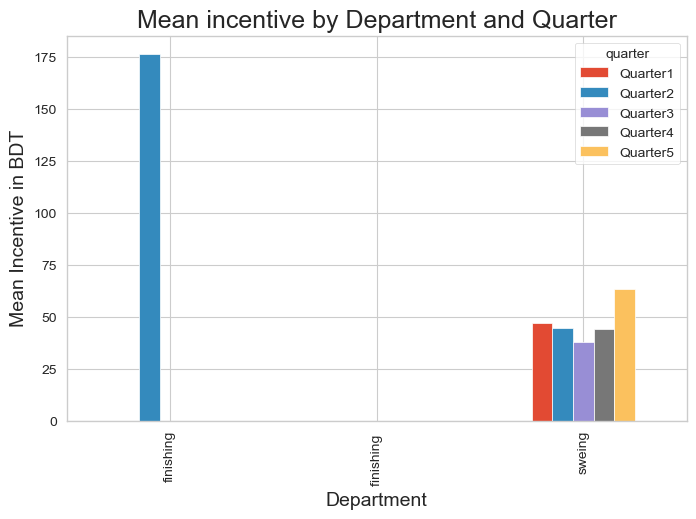

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Load the dataset
data = pd.read_csv("garments_worker_productivity.csv")

# Group the data by department and quarter and find the mean of the incentive column
department_quarter_incentive_mean = data.groupby(["department", "quarter"])["incentive"].mean()

# Plot the mean incentives
fig, ax = plt.subplots(figsize=(8, 5))

department_quarter_incentive_mean.unstack().plot.bar(ax=ax)

# Add the title, labels, and legend
ax.set_title("Mean incentive by Department and Quarter", fontsize=18)
ax.set_xlabel("Department", fontsize=14)
ax.set_ylabel("Mean Incentive in BDT", fontsize=14)

# Save the plot as a PNG
plt.savefig("mean_incentive_by_department_and_quarter.png")

# Show the plot
plt.show()

### Question 5 - How does the number of style changes impact productivity?

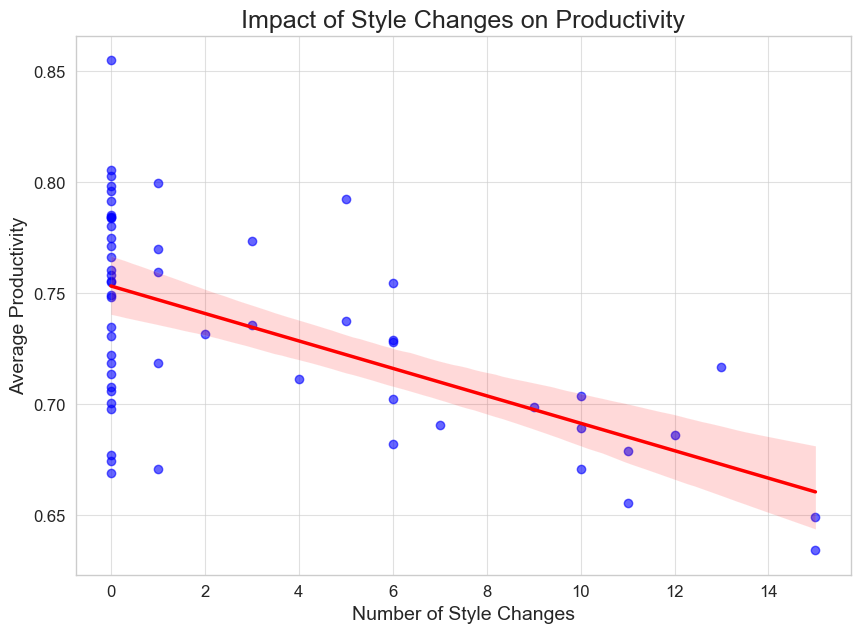

-0.5844193757627653

In [19]:
sns.set_style("whitegrid")

# Calculate average productivity and number of style changes by day
style_productivity = data.groupby('date').agg({'no_of_style_change': 'sum', 'actual_productivity': 'mean'}).reset_index()

# Create a scatter plot to visualize the relationship between number of style changes and productivity
plt.figure(figsize=(10, 7))
sns.regplot(x='no_of_style_change', y='actual_productivity', data=style_productivity, color='blue', scatter_kws={'alpha':0.6}, line_kws={"color": "red", "linewidth": 2.5})
plt.title('Impact of Style Changes on Productivity', fontsize=18)
plt.xlabel('Number of Style Changes', fontsize=14)
plt.ylabel('Average Productivity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.6)
plt.savefig("style_change.png")
plt.show()

# Calculate the correlation between number of style changes and productivity
correlation = style_productivity['no_of_style_change'].corr(style_productivity['actual_productivity'])

correlation

